In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#nombres de las columnas de los datos
col_names = ['Ugel', 'Especialidad', 'dni', 'Edad', 'Genero', 'Sector', 'class']
# Creando un dataframe de pandas
df = pd.read_csv('/content/db_coma.csv', header=None, names=col_names)

In [3]:
#visualizamos la base de datos con el nombre de sus columnas
df.head()

,Ugel,Especialidad,dni,Edad,Genero,Sector,class
0,UGEL 08 CAÑETE,EBR Inicial,44600980,48,F,Privado,si
1,UGEL 08 CAÑETE,EBR Inicial,72858696,29,F,Privado,si
2,UGEL 08 CAÑETE,EBR Inicial,15443329,44,F,Publico,si
3,UGEL 08 CAÑETE,EBR Inicial,43685324,44,F,Publico,si
4,UGEL 08 CAÑETE,EBR Inicial,45790098,44,F,Publico,si


In [4]:
df.drop('dni', axis=1, inplace=True)

In [5]:
df.head()

,Ugel,Especialidad,Edad,Genero,Sector,class
0,UGEL 08 CAÑETE,EBR Inicial,48,F,Privado,si
1,UGEL 08 CAÑETE,EBR Inicial,29,F,Privado,si
2,UGEL 08 CAÑETE,EBR Inicial,44,F,Publico,si
3,UGEL 08 CAÑETE,EBR Inicial,44,F,Publico,si
4,UGEL 08 CAÑETE,EBR Inicial,44,F,Publico,si


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1333 entries, 0 to 1332
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Ugel          1333 non-null   object
 1   Especialidad  1333 non-null   object
 2   Edad          1333 non-null   int64 
 3   Genero        1333 non-null   object
 4   Sector        1333 non-null   object
 5   class         1333 non-null   object
dtypes: int64(1), object(5)
memory usage: 62.6+ KB


In [7]:
feature_names = list(df.columns.values[:-1])
for feature in feature_names:
    unique_count = df[feature].nunique()
    unique_vals = df[feature].unique()
    print("{}: {} values, {}".format(feature, unique_count, unique_vals))

Ugel: 9 values, ['UGEL 08 CAÑETE' 'UGEL 09 HUAURA' 'UGEL 10 HUARAL' 'UGEL 11 CAJATAMBO'
 'UGEL 12 CANTA' 'UGEL 13 YAUYOS' 'UGEL 14 OYÓN' 'UGEL 15 HUAROCHIRÍ'
 'UGEL 16 BARRANCA']
Especialidad: 9 values, ['EBR Inicial' 'EBR Primaria' 'EBR Secundaria Ciencia y Tecnología'
 'EBR Secundaria Comunicación' 'EBR Secundaria Matemática'
 'EBR Primaria Profesor de Innovación Pedagógica'
 'EBR Secundaria Profesor de Innovación Pedagógica'
 'EBR Secundaria Educación para el Trabajo' 'EBR Secundaria Inglés']
Edad: 35 values, [48 29 44 38 40 30 42 52 34 28 50 36 46 32 35 57 39 26 31 45 43 41 27 37
 58 59 60 53 61 47 54 55 51 49 56]
Genero: 2 values, ['F' 'M']
Sector: 2 values, ['Privado' 'Publico']


In [8]:
label_name = df.columns.values[-1]
print("{}: {} values, {}".format(label_name, df[label_name].nunique(), df[label_name].unique()))

class: 2 values, ['si' 'no']


In [9]:
# Analizamos la cantidad de autos.
df[label_name].value_counts()

si    672
no    661
Name: class, dtype: int64

In [10]:
df_encoded = pd.get_dummies(df, columns=feature_names, drop_first=True)
df_encoded.tail()

,class,Ugel_UGEL 09 HUAURA,Ugel_UGEL 10 HUARAL,Ugel_UGEL 11 CAJATAMBO,Ugel_UGEL 12 CANTA,Ugel_UGEL 13 YAUYOS,Ugel_UGEL 14 OYÓN,Ugel_UGEL 15 HUAROCHIRÍ,Ugel_UGEL 16 BARRANCA,Especialidad_EBR Primaria,...,Edad_54,Edad_55,Edad_56,Edad_57,Edad_58,Edad_59,Edad_60,Edad_61,Genero_M,Sector_Publico
1328,no,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1329,no,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1330,no,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1331,no,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1332,no,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [11]:
df_encoded['class'], class_uniques = pd.factorize(df_encoded['class'])
df_encoded.tail()

,class,Ugel_UGEL 09 HUAURA,Ugel_UGEL 10 HUARAL,Ugel_UGEL 11 CAJATAMBO,Ugel_UGEL 12 CANTA,Ugel_UGEL 13 YAUYOS,Ugel_UGEL 14 OYÓN,Ugel_UGEL 15 HUAROCHIRÍ,Ugel_UGEL 16 BARRANCA,Especialidad_EBR Primaria,...,Edad_54,Edad_55,Edad_56,Edad_57,Edad_58,Edad_59,Edad_60,Edad_61,Genero_M,Sector_Publico
1328,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1329,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1330,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
1331,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1332,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1


In [12]:
# Save the class column as a Pandas Series.
class_col = df_encoded['class']
# Remove class column from DataFrame.
df_encoded.drop(columns=['class'], inplace=True)
# Get the position of where the last column will be inserted.
last_col_pos = df_encoded.columns.get_loc('Sector_Publico') + 1
# Insert the class column back into the DataFrame.
df_encoded.insert(last_col_pos, 'class', class_col)
df_encoded.tail()

,Ugel_UGEL 09 HUAURA,Ugel_UGEL 10 HUARAL,Ugel_UGEL 11 CAJATAMBO,Ugel_UGEL 12 CANTA,Ugel_UGEL 13 YAUYOS,Ugel_UGEL 14 OYÓN,Ugel_UGEL 15 HUAROCHIRÍ,Ugel_UGEL 16 BARRANCA,Especialidad_EBR Primaria,Especialidad_EBR Primaria Profesor de Innovación Pedagógica,...,Edad_55,Edad_56,Edad_57,Edad_58,Edad_59,Edad_60,Edad_61,Genero_M,Sector_Publico,class
1328,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
1329,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
1330,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1
1331,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
1332,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,1


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

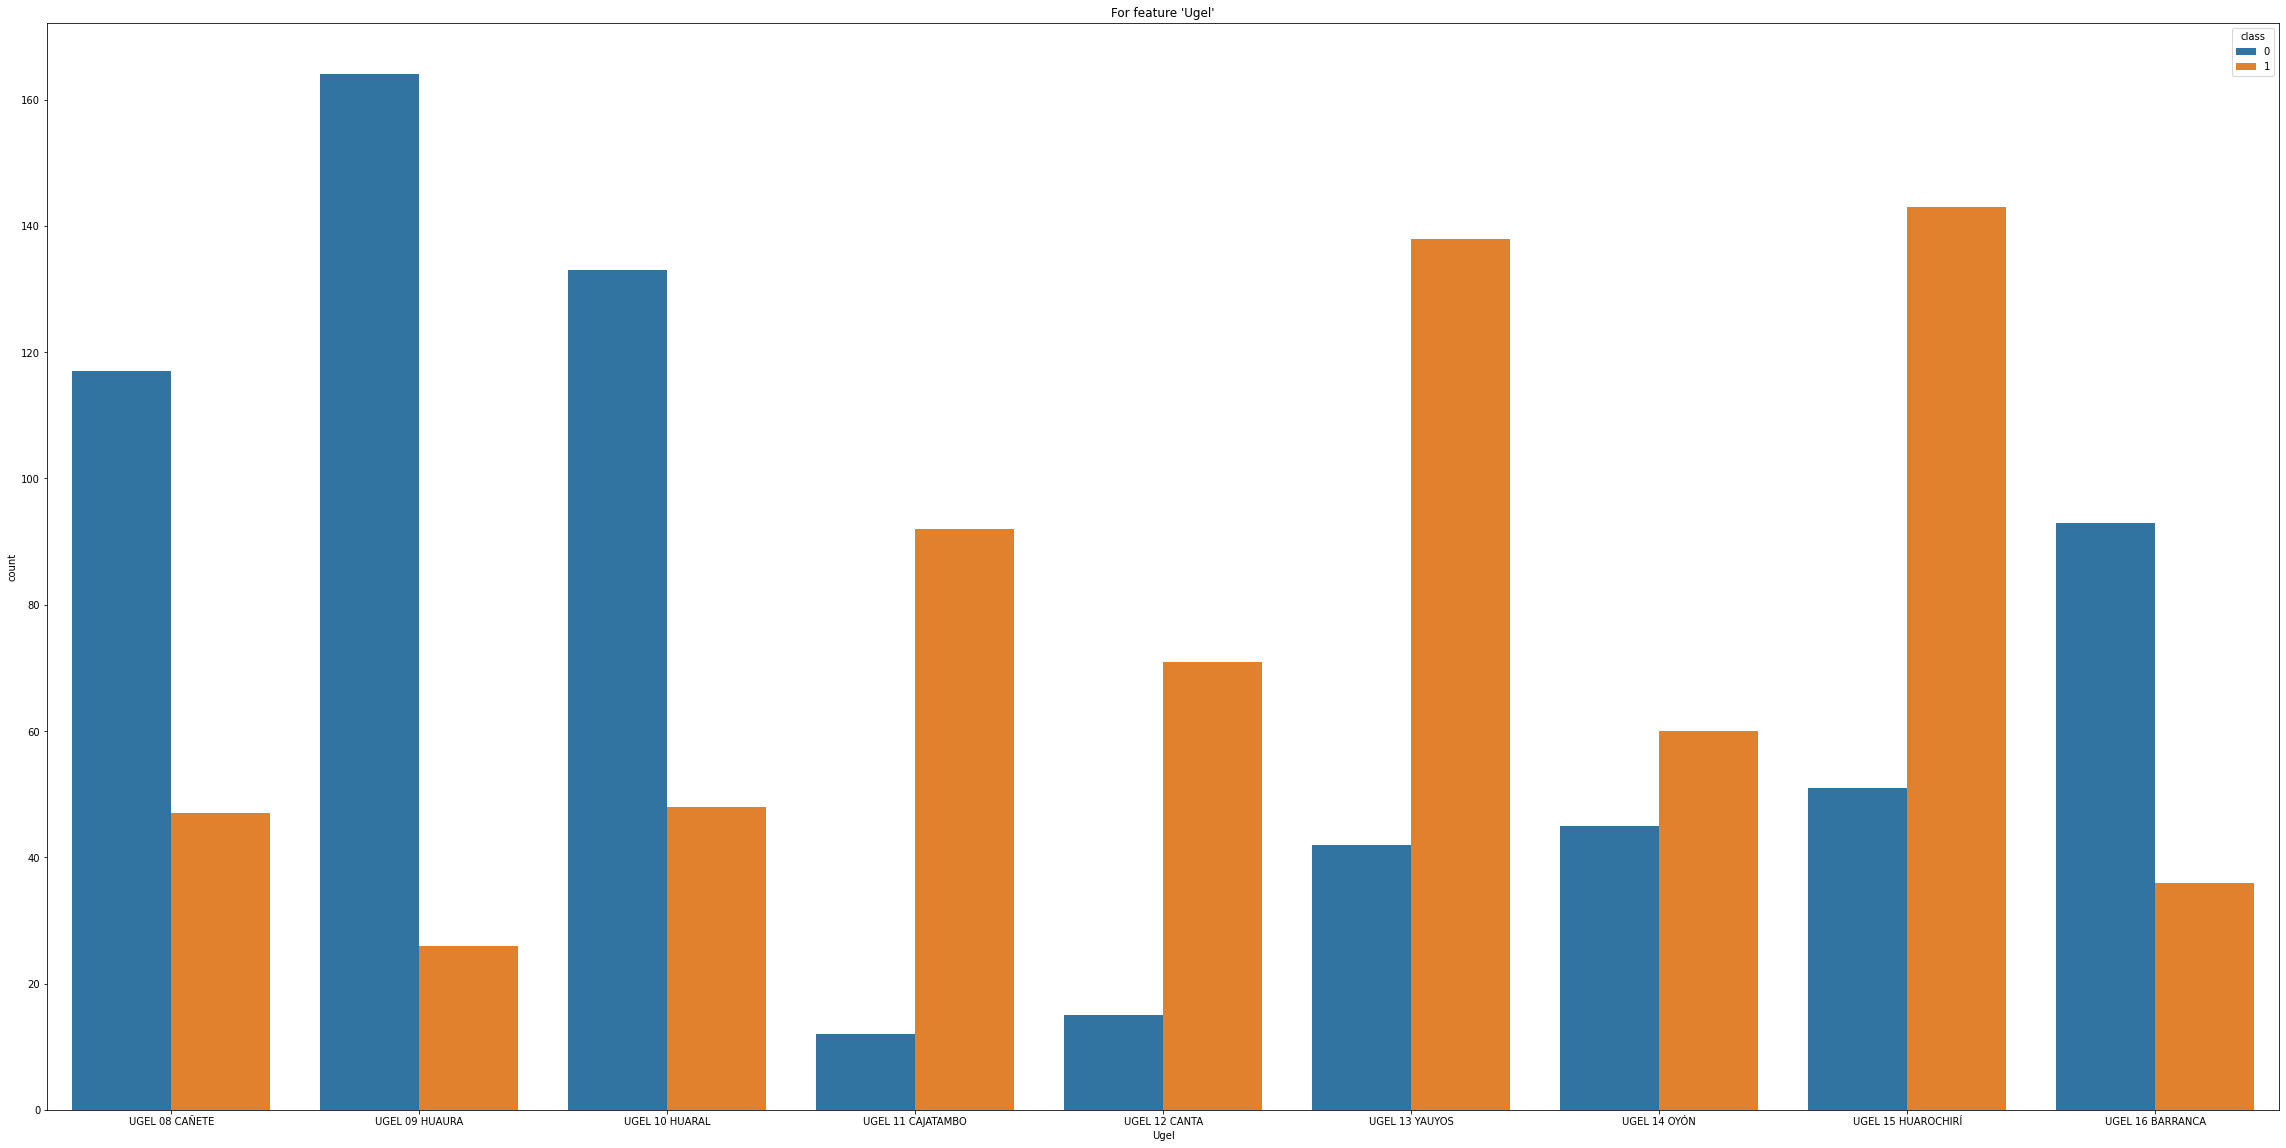

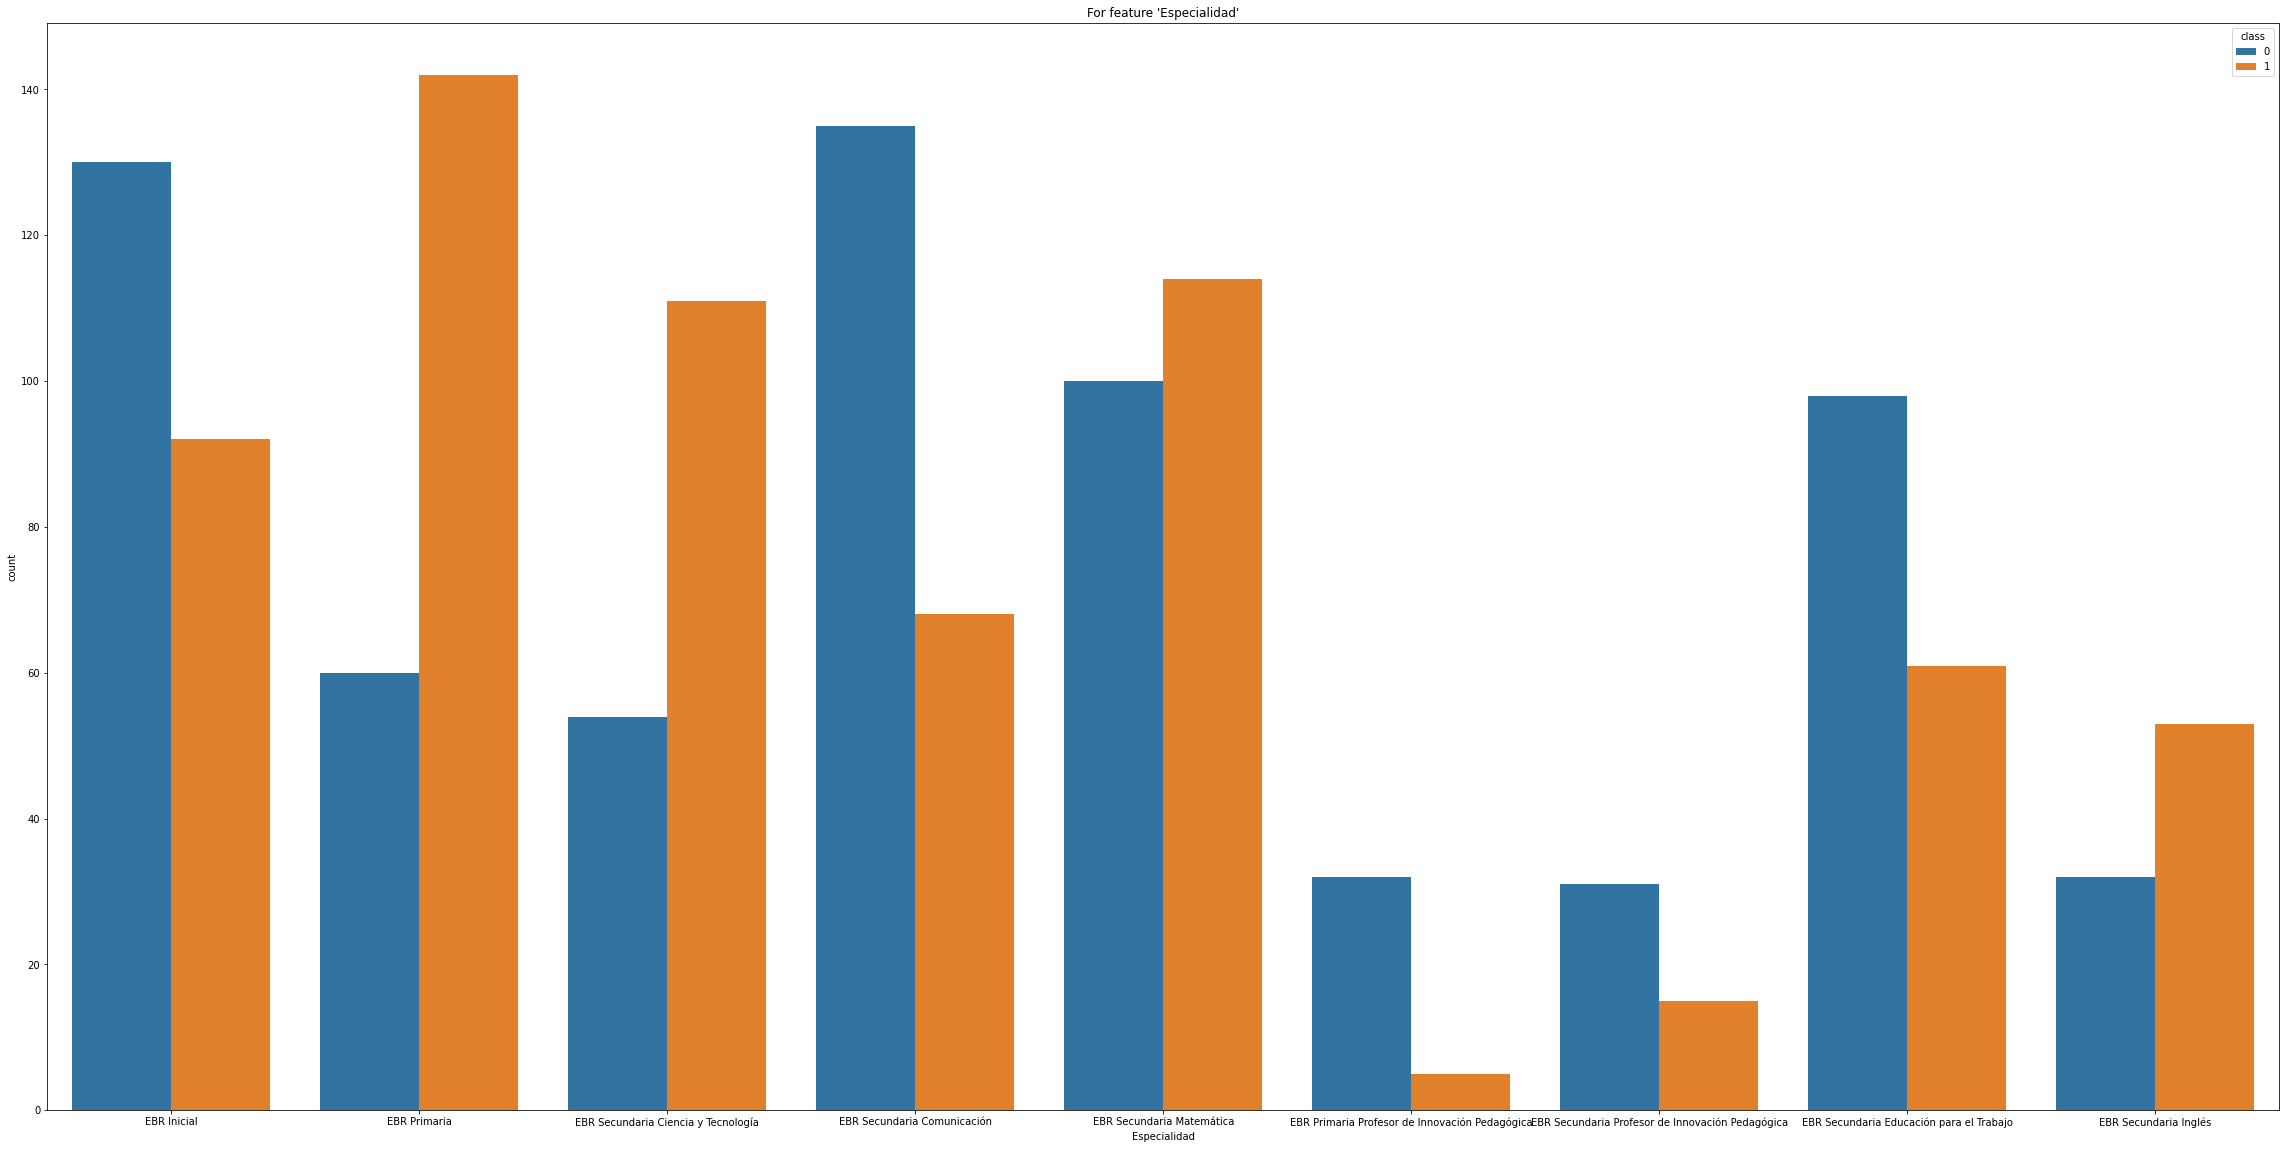

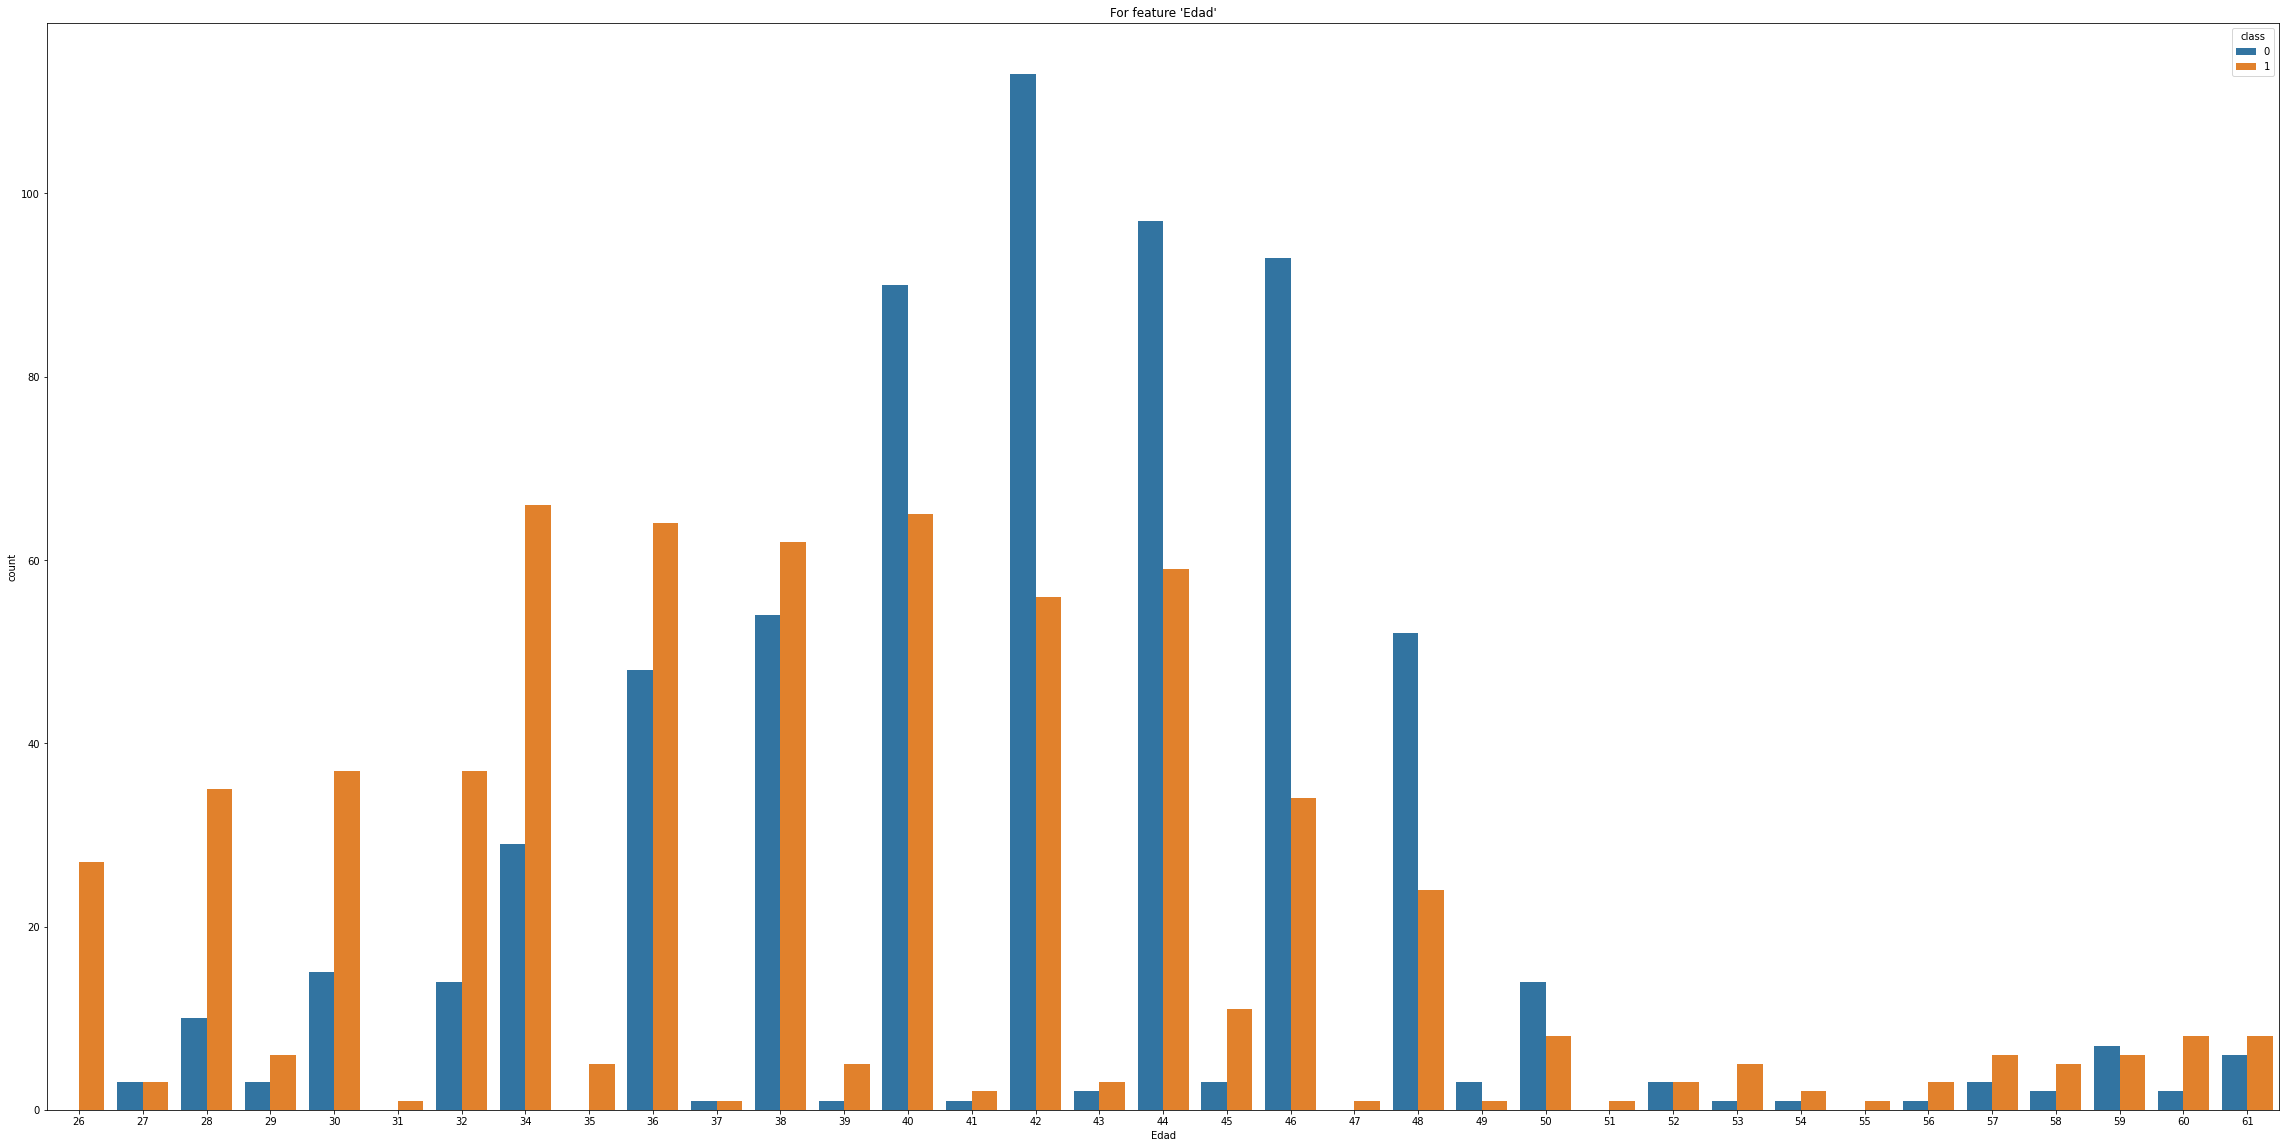

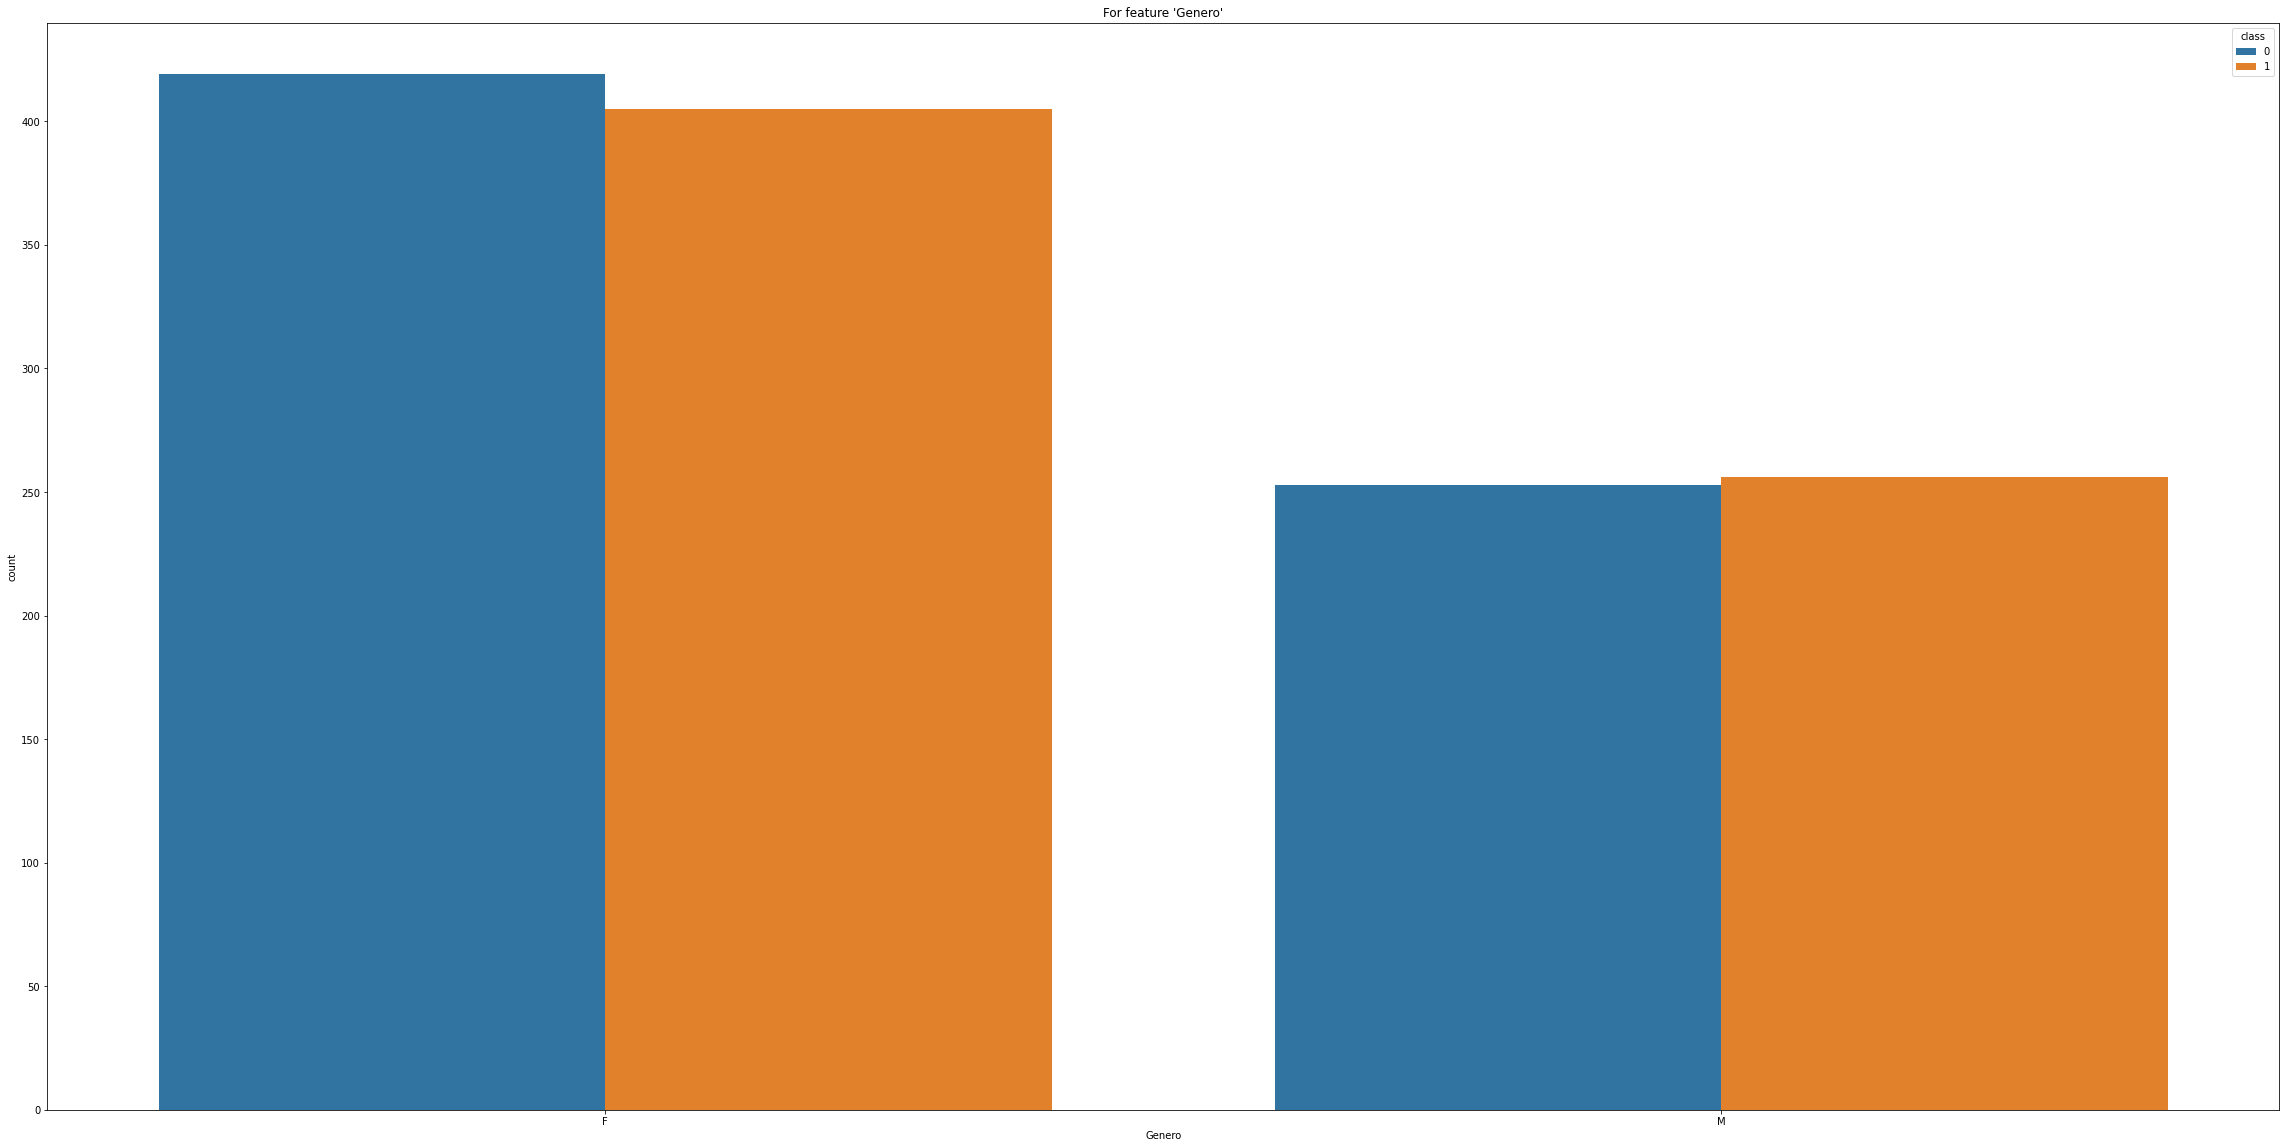

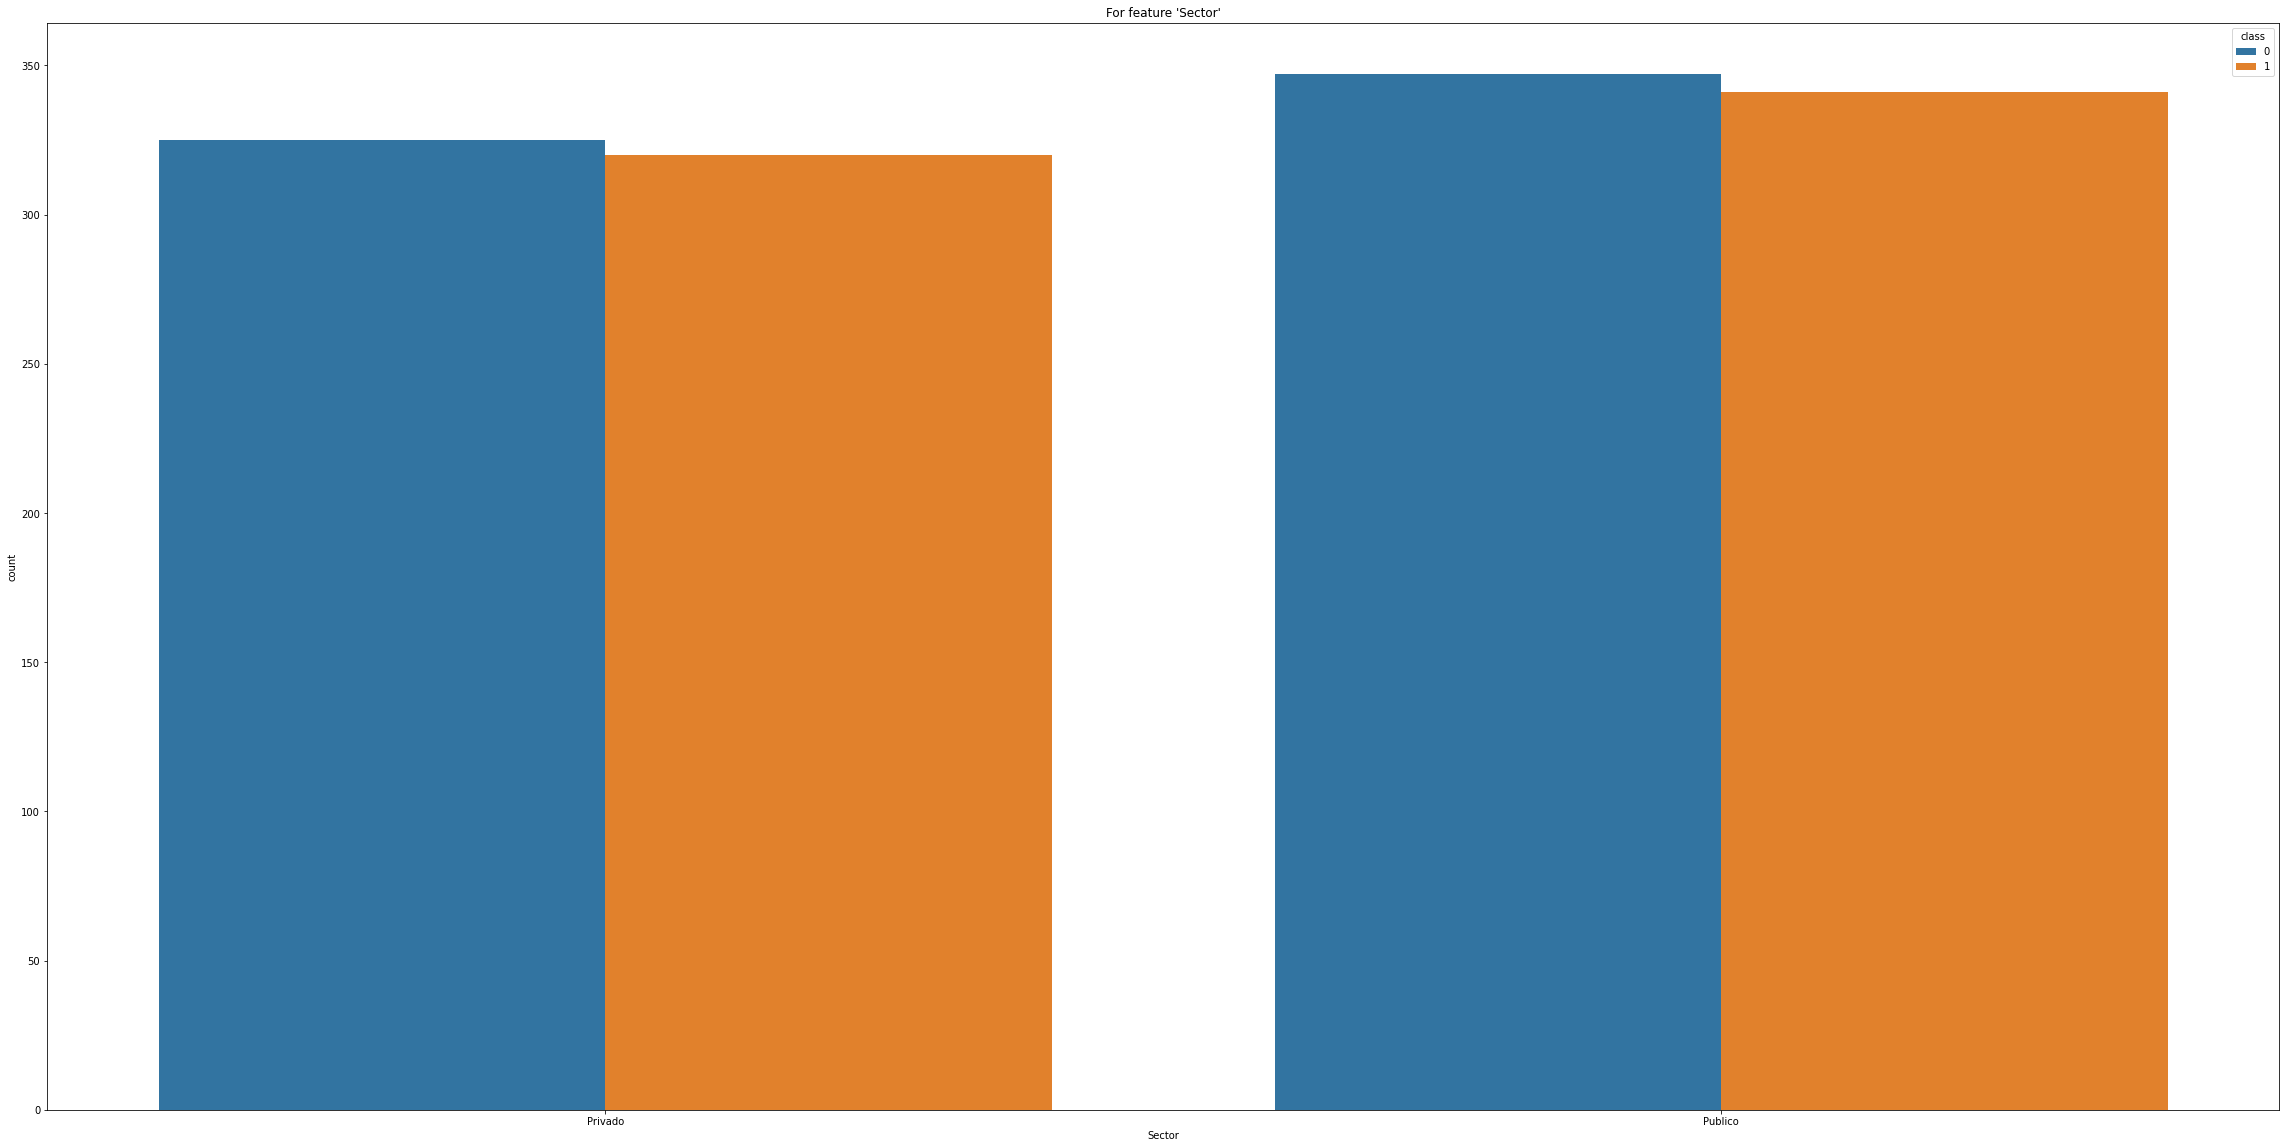

In [13]:
for i in df.columns[:-1]:
    plt.figure(figsize=(40,20))
    plt.title("For feature '%s'"%i)
    sns.countplot(df[i],hue=df_encoded['class'])

In [14]:
# Features.
X = df_encoded.loc[:, 'Ugel_UGEL 09 HUAURA':'Sector_Publico']
# Labels.
y = df_encoded.loc[:, 'class']

In [15]:
from sklearn.model_selection import train_test_split

# Mi Modelo de entrenamiento será 75% y 25%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict the test set results.
y_pred = clf.predict(X_test)
# Show first five predictions.
y_pred[0:5]

array([1, 1, 1, 0, 0])

In [18]:
class_uniques

Index(['si', 'no'], dtype='object')

In [19]:
# Mapping back to original class names.
y_pred_labelled = class_uniques[y_pred]
# Show first five predictions.
y_pred_labelled[0:5]

Index(['no', 'no', 'no', 'si', 'si'], dtype='object')

In [20]:
# Predicted probabilities of the first five predictions.
clf.predict_proba(X_test)[0:5]

array([[0.17      , 0.83      ],
       [0.29083333, 0.70916667],
       [0.12      , 0.88      ],
       [0.97      , 0.03      ],
       [0.96      , 0.04      ]])

In [21]:
from sklearn.metrics import accuracy_score

# Get the accuracy classification score.
accuracy_score(y_test, y_pred)

0.7934131736526946

In [22]:
from sklearn.metrics import confusion_matrix
y_pred = class_uniques[y_pred]
y_test = class_uniques[y_test]
confusion_matrix(y_test, y_pred, labels = ['si', 'no'])

array([[136,  30],
       [ 39, 129]])

In [23]:
from sklearn.metrics import classification_report

# Display the precision, recall and F1 score for each class.
print(classification_report(y_test, y_pred, labels=['si', 'no']))

              precision    recall  f1-score   support

          si       0.78      0.82      0.80       166
          no       0.81      0.77      0.79       168

    accuracy                           0.79       334
   macro avg       0.79      0.79      0.79       334
weighted avg       0.79      0.79      0.79       334

